# Lab 9 Networks

## Analysis of Networks with NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import os
import urllib.request
import xml.etree.ElementTree as ET
import pandas as pd

import scipy

In [2]:
G=nx.Graph()

In [3]:
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "blue"}),
    (3, {"color": "purple"}),
    (4, {"color": "brown"}),
    (5, {"color": "gray"}),
    (6, {"color": "black"}),
    (8, {"color": "brown"}),
])

In [4]:
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (2,5), (3,4), (3,5), (4,5)])
G.add_weighted_edges_from([(1,8, 2.0), (2,8, 3.0), (3,8, 1.5), (4,8, 2.5), (5,8, 4.0), (6,8, 3.5), (7,8, 1.5)])

In [5]:
highest_centrality_node = max(nx.degree_centrality(G))
highest_centrality_node

8

In [6]:
highest_bcentrality_node = max(nx.betweenness_centrality(G, weight = 3.0))
highest_bcentrality_node

8

The node with the highest centrality is 8. The highest betweenness centrality is 8.

In [7]:
positions=nx.spring_layout(G)

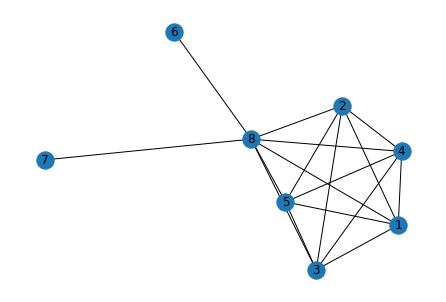

In [8]:
nx.draw(G, pos=positions)
nx.draw_networkx_labels(G, pos=positions)

plt.draw()

# Task 1

In [9]:
feed = urllib.request.urlopen("http://www.staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week09/netScience.graphml")
coauthorshipG=nx.read_graphml(feed)
nx.number_connected_components(coauthorshipG)

396

In [10]:
Gc = list(nx.biconnected_components(coauthorshipG))
longest_cc = max(Gc, key=len)
len(longest_cc)

134

In [12]:
authors = coauthorshipG.number_of_nodes()

In [13]:
relations = coauthorshipG.number_of_edges()
print(f"The number of authors in this graph is {authors} and the number of relations is {relations}.")

The number of authors in this graph is 1589 and the number of relations is 2742.


The longest length of the largest connected component subgraph is 134.

In [14]:
most_central_author = nx.betweenness_centrality(coauthorshipG)
max(most_central_author.values())

0.022459375113458798

In [15]:
import operator
maximum_value_pair = max(most_central_author.items(), key = operator.itemgetter(1))
maximum_value_pair[0]

'78.0'

The most central author with the highest between centrality is at node 78.

396 componenets

In [16]:
Gl = nx.average_clustering(coauthorshipG)
Gl

0.6377905695067805

# Task 2 - Analysing Text of Les Miserables

In [17]:
from urllib.request import urlopen
target_url0 = 'http://www.gutenberg.org/files/135/135-0.txt'
Miserables_raw = urlopen(target_url0).read().decode('utf-8')

In [18]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))
len(stop_words)

179

In [19]:
extra_words=['A','All','and','And','But','come','could','day','even','He',
             'he','it','It','If','I','In','like','man','made','men','must',
             'Man','One','one','She','see','she','said','say','Say','sort',
             'still','the','That','To','They','This','The','Then','There',
             'would','two','What','You','-','_','—','***','Gutenberg']

In [23]:
from nltk.tokenize import word_tokenize
Miserables_t  = word_tokenize(Miserables_raw)
from nltk.tokenize import sent_tokenize
Miserables_sentences = sent_tokenize(Miserables_raw)

In [25]:
filtered_book = [w for w in Miserables_t if not w in stop_words]
filtered_book2 = [w for w in filtered_book if not w in extra_words]

In [26]:
punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_book3 = [w for w in filtered_book2 if not w in punctuations]

In [33]:
text_start=filtered_book3.index('HAUTEVILLE')
filtered_book4 =filtered_book3[text_start:]
numTokens = len(filtered_book4)
numTokens

265651

In [34]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters  = len(character_list)

In [35]:
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =filtered_book4.count(character)
    k=k+1

In [36]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)   

In [37]:
for j in range(numCharacters):
    positions_current   =[]
    for i in range(numTokens):
        if filtered_book4[i]==character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:]=positions_current

In [46]:
character_map={}
for i in range(numCharacters):
    character_map[i]=character_list[i]

character_map

{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Cravatte',
 5: 'Valjean',
 6: 'Gervais',
 7: 'Fantine',
 8: 'Tholomyès',
 9: 'Blachevelle',
 10: 'Dahlia',
 11: 'Fameuil',
 12: 'Favourite',
 13: 'Listolier',
 14: 'Zéphine',
 15: 'Cosette',
 16: 'Thénardier',
 17: 'Éponine',
 18: 'Azelma',
 19: 'Javert',
 20: 'Fauchelevent',
 21: 'Bamatabois',
 22: 'Champmathieu',
 23: 'Brevet',
 24: 'Simplice',
 25: 'Chenildieu',
 26: 'Cochepaille',
 27: 'Innocente',
 28: 'Reverend',
 29: 'Ascension',
 30: 'Crucifixion',
 31: 'Gavroche',
 32: 'Magnon',
 33: 'Gillenormand',
 34: 'Marius',
 35: 'Colonel',
 36: 'Mabeuf',
 37: 'Enjolras',
 38: 'Combeferre',
 39: 'Prouvaire',
 40: 'Feuilly',
 41: 'Courfeyrac',
 42: 'Bahorel',
 43: 'Lesgle',
 44: 'Joly',
 45: 'Grantaire',
 46: 'Patron-Minette',
 47: 'Brujon',
 48: 'Toussaint'}

In [39]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<500):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1

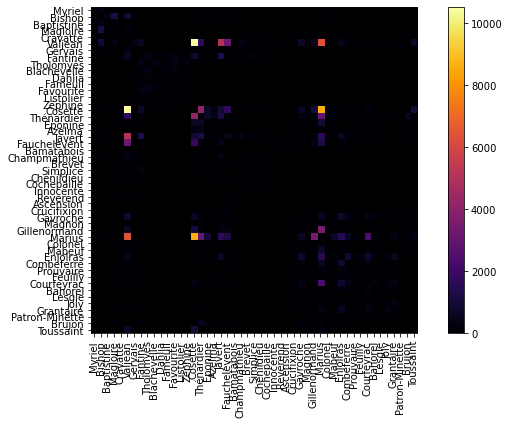

In [42]:
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=plt.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=10)

In [43]:
G1=nx.from_numpy_matrix(interactions_characters)

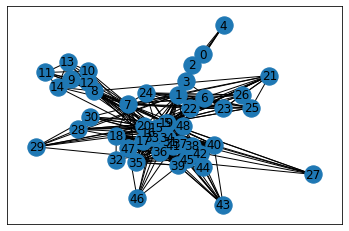

In [44]:
nx.draw_networkx(G1)

In [48]:
H1 = nx.relabel_nodes(G1, character_map)
H1

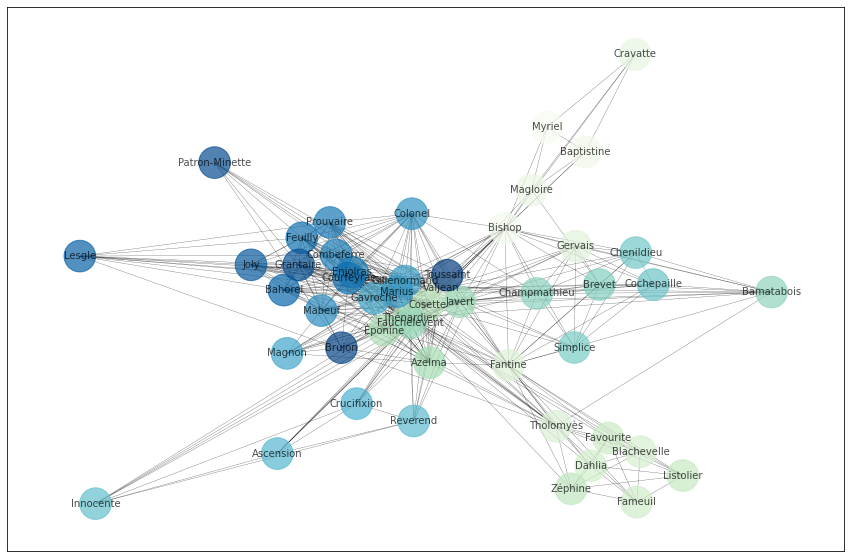

In [59]:
fig = plt.figure(figsize = (15,10))
fig = nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=plt.cm.GnBu, 
                 node_size = 1000)

## Other Section

In [217]:
feed = urllib.request.urlopen("http://feeds.bbci.co.uk/news/world/rss.xml?edition=uk")
tree = ET.parse(feed)
root = tree.getroot()
print("Root node is: ", root.tag, "with attributes: ", root.attrib)
list(root[0].getchildren())

Root node is:  rss with attributes:  {'version': '2.0'}


AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'getchildren'

In [47]:
URL = "http://staff.city.ac.uk/~sbbb717/moodle/19-20/inm430/week09/netScience.graphml"
response = requests.get(URL)
with open("netScience.graphml", 'wb') as file:
    nx.read_graphml(response.content)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rgs88\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rgs88\AppData\Local\Temp\ipykernel_26008\2758270483.py", line 4, in <cell line: 3>
    nx.read_graphml(response.content)
  File "<class 'networkx.utils.decorators.argmap'> compilation 17", line 5, in argmap_read_graphml_13
  File "C:\Users\rgs88\anaconda3\lib\site-packages\networkx\readwrite\graphml.py", line 296, in read_graphml
    glist = list(reader(path=path))
  File "C:\Users\rgs88\anaconda3\lib\site-packages\networkx\readwrite\graphml.py", line 852, in __call__
    self.xml = ElementTree(file=path)
  File "C:\Users\rgs88\anaconda3\lib\xml\etree\ElementTree.py", line 540, in __init__
    self.parse(file)
  File "C:\Users\rgs88\anaconda3\lib\xml\etree\ElementTree.py", line 569, in parse
    source = open(source, "rb")
FileNotFoundError: [Errno 2] No such file or directo

NameError: name 'response_content' is not defined